In [32]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import os
import glob
from datetime import date

import warnings

## Prepare a table with Family/Genus numbers and correlation

In [33]:
# read "GENUS / ABUD / part" data
bgi_df = pd.read_excel('results/aggregation/Cross-Platform_set/abud/Genus_BGI_merged_output_part.xlsx')
ill_df = pd.read_excel('results/aggregation/Cross-Platform_set/abud/Genus_Illumina_merged_output_part.xlsx')

# Define sample names
samples = [name[4:] for name in bgi_df.columns[1:]]

# Initialize a list to store DataFrames
dfs = []

for sample in samples:
    ill_col_name = 'ill_' + sample
    bgi_col_name = 'bgi_' + sample

    if ill_col_name in ill_df.columns and bgi_col_name in bgi_df.columns:
        smpl_bgi = bgi_df[['name', bgi_col_name]][pd.notna(bgi_df[bgi_col_name]) & (bgi_df[bgi_col_name] > 0)]
        smpl_ill = ill_df[['name', ill_col_name]][pd.notna(ill_df[ill_col_name]) & (ill_df[ill_col_name] > 0)]

        merged = pd.merge(smpl_bgi, smpl_ill, on='name', how='outer')

        if len(smpl_bgi) > 1 and len(smpl_ill) > 1 and len(smpl_bgi) > 1:  # Check for non-zero variance
            merged = pd.merge(smpl_bgi, smpl_ill, on='name', how='outer')
            corr = merged[bgi_col_name].corr(merged[ill_col_name])
        else:
            corr = None  # Set correlation to None if zero variance

        common_values = len(set(smpl_bgi['name']).intersection(set(smpl_ill['name'])))
        only_bgi_species = len(smpl_bgi.loc[~smpl_bgi['name'].isin(smpl_ill['name'])])
        only_ill_species = len(smpl_ill.loc[~smpl_ill['name'].isin(smpl_bgi['name'])])

        current_df = pd.DataFrame({'name': sample, 'bgi_genus': len(smpl_bgi), 'ill_genus': len(smpl_ill),
                                   'abud_corr': corr, 'common_genus': common_values,
                                   'only_bgi_genus': only_bgi_species, 'only_ill_genus': only_ill_species},
                                  index=[0])

        dfs.append(current_df)

# Concatenate all DataFrames in the list
df = pd.concat(dfs, ignore_index=True)

# Sort DataFrame
df = df.sort_values(by='common_genus', ascending=False)

# Save to Excel
df.to_excel('results/Overlap_Genus_abud_part.xlsx', index=False)
df.head()


/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-package

,name,bgi_genus,ill_genus,abud_corr,common_genus,only_bgi_genus,only_ill_genus
355,V46GGV,20,20,0.99844,20,0,0
814,V4PAWM,20,20,0.995023,20,0,0
607,VK0DHL,19,19,0.998456,19,0,0
1713,VHOSFY,20,19,0.993679,19,1,0
1921,VT9BGT,19,18,0.962091,18,1,0


In [34]:
# read "GENUS / ABUD / part" data
bgi_df = pd.read_excel('results/aggregation/Cross-Platform_set/abud/Genus_BGI_merged_output_all.xlsx')
ill_df = pd.read_excel('results/aggregation/Cross-Platform_set/abud/Genus_Illumina_merged_output_all.xlsx')

# Define sample names
samples = [name[4:] for name in bgi_df.columns[1:]]

# Initialize a list to store DataFrames
dfs = []

for sample in samples:
    ill_col_name = 'ill_' + sample
    bgi_col_name = 'bgi_' + sample

    if ill_col_name in ill_df.columns and bgi_col_name in bgi_df.columns:
        smpl_bgi = bgi_df[['name', bgi_col_name]][pd.notna(bgi_df[bgi_col_name]) & (bgi_df[bgi_col_name] > 0)]
        smpl_ill = ill_df[['name', ill_col_name]][pd.notna(ill_df[ill_col_name]) & (ill_df[ill_col_name] > 0)]

        merged = pd.merge(smpl_bgi, smpl_ill, on='name', how='outer')

        if len(smpl_bgi) > 1 and len(smpl_ill) > 1 and len(smpl_bgi) > 1:  # Check for non-zero variance
            merged = pd.merge(smpl_bgi, smpl_ill, on='name', how='outer')
            corr = merged[bgi_col_name].corr(merged[ill_col_name])
        else:
            corr = None  # Set correlation to None if zero variance

        common_values = len(set(smpl_bgi['name']).intersection(set(smpl_ill['name'])))
        only_bgi_species = len(smpl_bgi.loc[~smpl_bgi['name'].isin(smpl_ill['name'])])
        only_ill_species = len(smpl_ill.loc[~smpl_ill['name'].isin(smpl_bgi['name'])])

        current_df = pd.DataFrame({'name': sample, 'bgi_genus': len(smpl_bgi), 'ill_genus': len(smpl_ill),
                                   'abud_corr': corr, 'common_genus': common_values,
                                   'only_bgi_genus': only_bgi_species, 'only_ill_genus': only_ill_species},
                                  index=[0])

        dfs.append(current_df)

# Concatenate all DataFrames in the list
df = pd.concat(dfs, ignore_index=True)

# Sort DataFrame
df = df.sort_values(by='common_genus', ascending=False)

# Save to Excel
df.to_excel('results/Overlap_Genus_abud_all.xlsx', index=False)
df.head()


,name,bgi_genus,ill_genus,abud_corr,common_genus,only_bgi_genus,only_ill_genus
990,VWKCGE,1539,1446,0.976937,1314,225,132
122,VMB23G,1349,1456,0.996688,1286,63,170
1131,VP2R0N,1441,1377,0.997705,1281,160,96
1698,V4JH2B,1344,1300,0.998223,1231,113,69
1938,VAJHM2,1478,1301,0.997564,1231,247,70


In [14]:
# read "GENUS / ABUD / part" data
bgi_df = pd.read_excel('results/aggregation/Cross-Platform_set/abud/Family_BGI_merged_output_part.xlsx')
ill_df = pd.read_excel('results/aggregation/Cross-Platform_set/abud/Family_Illumina_merged_output_part.xlsx')

# Define sample names
samples = [name[4:] for name in bgi_df.columns[1:]]

# Initialize a list to store DataFrames
dfs = []

for sample in samples:
    ill_col_name = 'ill_' + sample
    bgi_col_name = 'bgi_' + sample

    if ill_col_name in ill_df.columns and bgi_col_name in bgi_df.columns:
        smpl_bgi = bgi_df[['family', bgi_col_name]][pd.notna(bgi_df[bgi_col_name]) & (bgi_df[bgi_col_name] > 0)]
        smpl_ill = ill_df[['family', ill_col_name]][pd.notna(ill_df[ill_col_name]) & (ill_df[ill_col_name] > 0)]

        merged = pd.merge(smpl_bgi, smpl_ill, on='family', how='outer')

        if len(smpl_bgi) > 1 and len(smpl_ill) > 1 and len(smpl_bgi) > 1:  # Check for non-zero variance
            merged = pd.merge(smpl_bgi, smpl_ill, on='family', how='outer')
            corr = merged[bgi_col_name].corr(merged[ill_col_name])
        else:
            corr = None  # Set correlation to None if zero variance

        common_values = len(set(smpl_bgi['family']).intersection(set(smpl_ill['family'])))
        only_bgi_species = len(smpl_bgi.loc[~smpl_bgi['family'].isin(smpl_ill['family'])])
        only_ill_species = len(smpl_ill.loc[~smpl_ill['family'].isin(smpl_bgi['family'])])

        current_df = pd.DataFrame({'name': sample, 'bgi_family': len(smpl_bgi), 'ill_family': len(smpl_ill),
                                   'abud_corr': corr, 'common_family': common_values,
                                   'only_bgi_family': only_bgi_species, 'only_ill_family': only_ill_species},
                                  index=[0])

        dfs.append(current_df)

# Concatenate all DataFrames in the list
df = pd.concat(dfs, ignore_index=True)

# Sort DataFrame
df = df.sort_values(by='common_family', ascending=False)

# Save to Excel
df.to_excel('results/Overlap_Family_abud_part.xlsx', index=False)
warnings.filterwarnings("ignore")

df.head()


/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-package

,name,bgi_family,ill_family,abud_corr,common_family,only_bgi_family,only_ill_family
122,VMB23G,15,15,0.999253,15,0,0
1192,V8M1K2,16,16,0.999368,15,1,1
1627,V1M14M,16,15,0.999823,15,1,0
1393,VJR62K,16,17,0.994144,15,1,2
1439,V6SZC7,15,15,0.999972,15,0,0


In [39]:
# read "GENUS / ABUD / part" data
bgi_df = pd.read_excel('results/aggregation/Cross-Platform_set/abud/Family_BGI_merged_output_all.xlsx')
ill_df = pd.read_excel('results/aggregation/Cross-Platform_set/abud/Family_Illumina_merged_output_all.xlsx')

# Define sample names
samples = [name[4:] for name in bgi_df.columns[1:]]

# Initialize a list to store DataFrames
dfs = []

for sample in samples:
    ill_col_name = 'ill_' + sample
    bgi_col_name = 'bgi_' + sample

    if ill_col_name in ill_df.columns and bgi_col_name in bgi_df.columns:
        smpl_bgi = bgi_df[['family', bgi_col_name]][pd.notna(bgi_df[bgi_col_name]) & (bgi_df[bgi_col_name] > 0)]
        smpl_ill = ill_df[['family', ill_col_name]][pd.notna(ill_df[ill_col_name]) & (ill_df[ill_col_name] > 0)]

        merged = pd.merge(smpl_bgi, smpl_ill, on='family', how='outer')

        if len(smpl_bgi) > 1 and len(smpl_ill) > 1 and len(smpl_bgi) > 1:  # Check for non-zero variance
            merged = pd.merge(smpl_bgi, smpl_ill, on='family', how='outer')
            corr = merged[bgi_col_name].corr(merged[ill_col_name])
        else:
            corr = None  # Set correlation to None if zero variance

        common_values = len(set(smpl_bgi['family']).intersection(set(smpl_ill['family'])))
        only_bgi_species = len(smpl_bgi.loc[~smpl_bgi['family'].isin(smpl_ill['family'])])
        only_ill_species = len(smpl_ill.loc[~smpl_ill['family'].isin(smpl_bgi['family'])])

        current_df = pd.DataFrame({'name': sample, 'bgi_family': len(smpl_bgi), 'ill_family': len(smpl_ill),
                                   'abud_corr': corr, 'common_family': common_values,
                                   'only_bgi_family': only_bgi_species, 'only_ill_family': only_ill_species},
                                  index=[0])

        dfs.append(current_df)

# Concatenate all DataFrames in the list
df = pd.concat(dfs, ignore_index=True)

# Sort DataFrame
df = df.sort_values(by='common_family', ascending=False)

# Save to Excel
df.to_excel('results/Overlap_Family_abud_all.xlsx', index=False)
warnings.filterwarnings("ignore")

df.head()


,name,bgi_family,ill_family,abud_corr,common_family,only_bgi_family,only_ill_family
990,VWKCGE,470,454,0.99883,401,69,53
1192,V8M1K2,376,422,0.999422,338,38,84
548,V247S0,424,367,0.999481,337,87,30
863,V8A6PN,385,351,0.999709,334,51,17
1894,VKYZT5,416,366,0.998754,332,84,34


### Visualisation

Number genus BGI > Ill -  582
Number genus Ill > BGI -  604


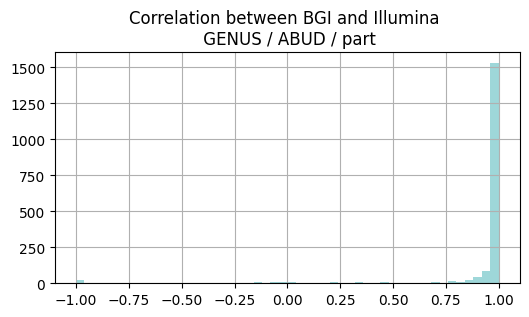

In [44]:
gnP = pd.read_excel('results/Overlap_Genus_abud_part.xlsx')
gnP['abud_corr'].hist(bins=50, figsize=(6,3), color='#75c7c9', alpha=0.7)
plt.title('Correlation between BGI and Illumina \n GENUS / ABUD / part')

plt.savefig('results/CorrHist_Genus_abud_part.png', dpi=300, bbox_inches='tight')

print('Number genus BGI > Ill - ', sum((gnP['bgi_genus'] > gnP['ill_genus'])))
print('Number genus Ill > BGI - ', sum((gnP['ill_genus'] > gnP['bgi_genus'])))

Number genus BGI > Ill -  1990
Number genus Ill > BGI -  1917


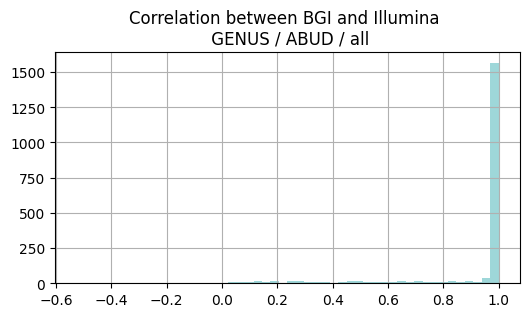

In [45]:
gnA = pd.read_excel('results/Overlap_Genus_abud_all.xlsx')
gnA['abud_corr'].hist(bins=50, figsize=(6,3), color='#75c7c9', alpha=0.7)
plt.title('Correlation between BGI and Illumina \n GENUS / ABUD / all')

plt.savefig('results/CorrHist_Genus_abud_all.png', dpi=300, bbox_inches='tight')

print('Number genus BGI > Ill - ', sum((gnA['bgi_genus'] > gnP['ill_genus'])))
print('Number genus Ill > BGI - ', sum((gnA['ill_genus'] > gnP['bgi_genus'])))

Number families BGI > Ill -  528
Number families Ill > BGI -  528


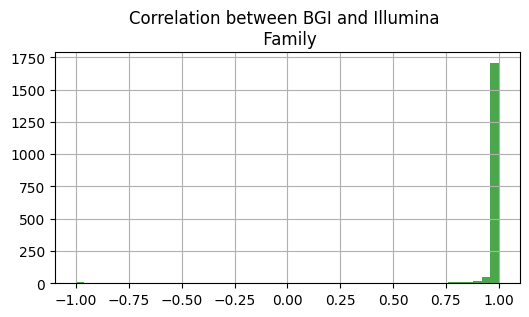

In [49]:
fmP = pd.read_excel('results/Overlap_Family_abud_part.xlsx')
fmP['abud_corr'].hist(bins=50, figsize=(6,3), color='green', alpha=0.7)
plt.title('Correlation between BGI and Illumina \n Family')

plt.savefig('results/CorrHist_Family_abud_part.png', dpi=300, bbox_inches='tight')

print('Number families BGI > Ill - ', sum((fmP['bgi_family'] > fmP['ill_family'])))
print('Number families Ill > BGI - ', sum((fmP['ill_family'] > fmP['bgi_family'])))

Number families BGI > Ill -  528
Number families Ill > BGI -  528


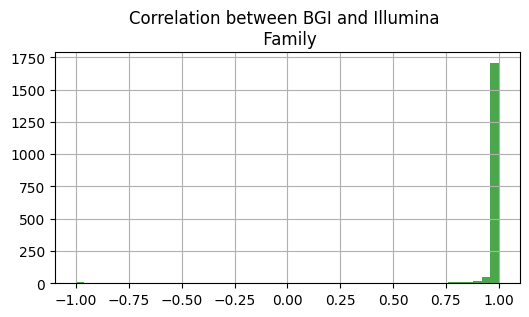

In [50]:
fmA = pd.read_excel('results/Overlap_Family_abud_part.xlsx')
fmA['abud_corr'].hist(bins=50, figsize=(6,3), color='green', alpha=0.7)
plt.title('Correlation between BGI and Illumina \n Family')

plt.savefig('results/CorrHist_Family_abud_part.png', dpi=300, bbox_inches='tight')

print('Number families BGI > Ill - ', sum((fmA['bgi_family'] > fmA['ill_family'])))
print('Number families Ill > BGI - ', sum((fmA['ill_family'] > fmA['bgi_family'])))

### Scatter

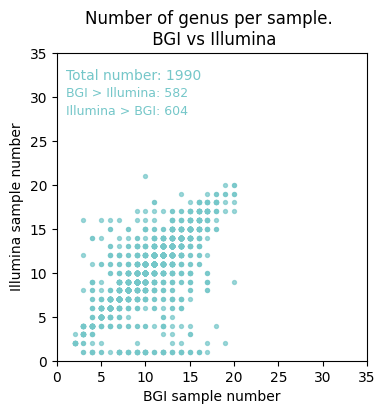

In [51]:
gnP = pd.read_excel('results/Overlap_Genus_abud_part.xlsx')

plt.figure(figsize=(4,4))
plt.scatter(gnP['bgi_genus'], gnP['ill_genus'], color='#75c7c9', alpha=0.7, s=8)
plt.xlabel('BGI sample number')
plt.ylabel('Illumina sample number')
plt.xlim(0, 35)
plt.ylim(0, 35)
plt.title('Number of genus per sample. \n BGI vs Illumina')
plt.text(1,32, 'Total number: '+str(len(gnP)), color='#75c7c9')
plt.text(1,30, 'BGI > Illumina: '+str(sum((gnP['bgi_genus'] > gnP['ill_genus']))), fontsize=9, color='#75c7c9')
plt.text(1,28, 'Illumina > BGI: '+str(sum((gnP['ill_genus'] > gnP['bgi_genus']))), fontsize=9, color='#75c7c9')

plt.savefig('results/Scatter_Genus_abud_part.png', dpi=300, bbox_inches='tight')

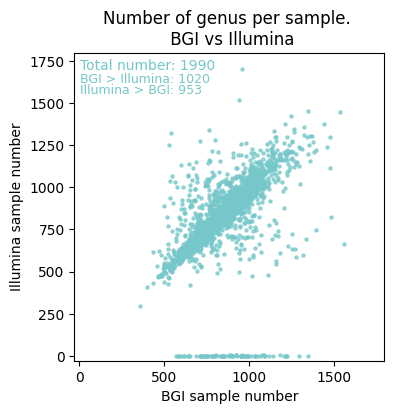

In [68]:
gnA = pd.read_excel('results/Overlap_Genus_abud_all.xlsx')

plt.figure(figsize=(4,4))
plt.scatter(gnA['bgi_genus'], gnA['ill_genus'], color='#75c7c9', alpha=0.7, s=5)
plt.xlabel('BGI sample number')
plt.ylabel('Illumina sample number')
plt.xlim(-30, 1800)
plt.ylim(-30, 1800)
plt.title('Number of genus per sample. \n BGI vs Illumina')
plt.text(1,1700, 'Total number: '+str(len(gnA)), color='#75c7c9')
plt.text(1,1620, 'BGI > Illumina: '+str(sum((gnA['bgi_genus'] > gnA['ill_genus']))), fontsize=9, color='#75c7c9')
plt.text(1,1560, 'Illumina > BGI: '+str(sum((gnA['ill_genus'] > gnA['bgi_genus']))), fontsize=9, color='#75c7c9')

plt.savefig('results/Scatter_Genus_abud_all.png', dpi=300, bbox_inches='tight')

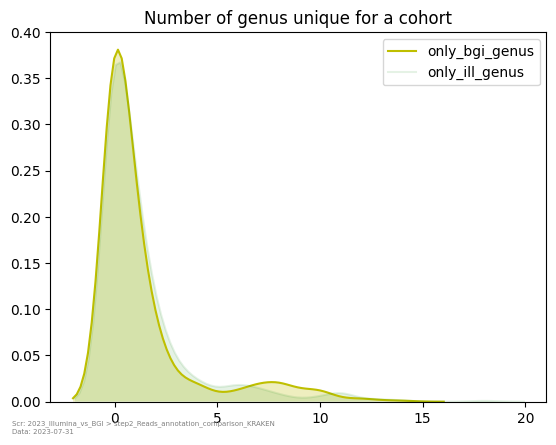

In [20]:
sns.kdeplot(df['only_bgi_genus'], shade=True, color='y')
sns.kdeplot(df['only_ill_genus'], shade=True, color='g', alpha=0.1)

plt.title('Number of genus unique for a cohort')

plt.text(-5,-0.025, 'Scr: 2023_Illumina_vs_BGI > step2_Reads_annotation_comparison_KRAKEN', color='grey', fontsize=5)
plt.text(-5,-0.035, 'Data: '+str(date.today()), color='grey', fontsize=5)

# Show the plot
plt.savefig('results/Genus_bar_ch2.png')
plt.savefig('results/Genus_bar_ch2.svg')

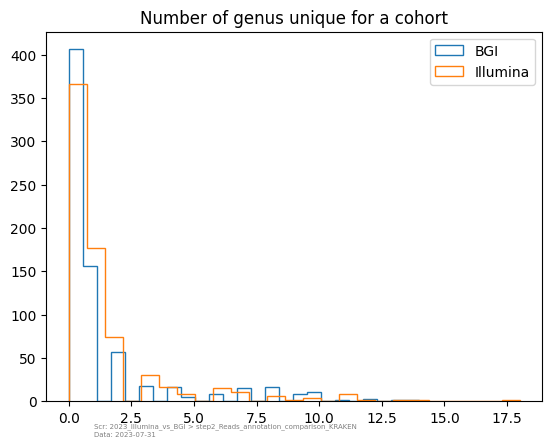

In [21]:
plt.hist(df['only_bgi_genus'], bins=25, histtype='step', stacked=True, fill=False, label='BGI')
plt.hist(df['only_ill_genus'], bins=25, histtype='step', stacked=True, fill=False, label='Illumina')
plt.legend()

plt.title('Number of genus unique for a cohort')

plt.text(1,-30, 'Scr: 2023_Illumina_vs_BGI > step2_Reads_annotation_comparison_KRAKEN', color='grey', fontsize=5)
plt.text(1,-40, 'Data: '+str(date.today()), color='grey', fontsize=5)

# Show the plot
plt.savefig('results/Genus_bar_ch3.png')
plt.savefig('results/Genus_bar_ch3.svg')